In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import Soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")

import json
from datetime import datetime

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek


pd.set_option("display.max_columns", None)

La variable dependiente es **"Atrittion"**

In [2]:
data_general=pd.read_csv("../../datos/datos0/general_data.csv")

In [3]:
data_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
data_general.shape

(4410, 24)

In [5]:
empleados=pd.read_csv("../../datos/datos0/employee_survey_data.csv")

In [6]:
empleados.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [7]:
empleados.shape

(4410, 4)

In [8]:
empleados.drop(columns="EmployeeID", inplace=True)

In [9]:
managers=pd.read_csv("../../datos/datos0/manager_survey_data.csv")

In [10]:
managers.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [11]:
managers.drop(columns="EmployeeID", inplace=True)

In [12]:
managers.shape

(4410, 2)

# PRIMERO VAMOS A JUNTAR LAS DISTINTAS TABLAS

In [13]:
df_crudo=pd.DataFrame()
df_crudo=pd.concat([df_crudo, data_general, empleados, managers], axis=1)

In [14]:
df_crudo.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4


**CONVERTIMOS A NUMÉRICA LA VARIABLE DEPENDIENTE**

In [15]:
dicc_dependiente={"No":0,
                  "Yes":1}
df_crudo["Attrition"]=df_crudo["Attrition"].map(dicc_dependiente)

In [16]:
f.exploracion_dataframe(df_crudo, "Attrition")

El número de datos es 4410 y el de columnas es 29

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
NumCompaniesWorked,0.430839
TotalWorkingYears,0.204082
EnvironmentSatisfaction,0.566893
JobSatisfaction,0.453515
WorkLifeBalance,0.861678



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Age,int64
Attrition,int64
BusinessTravel,object
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeID,int64
Gender,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna BUSINESSTRAVEL tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
BusinessTravel,
Travel_Rarely,3129
Travel_Frequently,831
Non-Travel,450


La columna DEPARTMENT tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
Department,
Research & Development,2883
Sales,1338
Human Resources,189


La columna EDUCATIONFIELD tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


,count
EducationField,
Life Sciences,1818
Medical,1392
Marketing,477
Technical Degree,396
Other,246


La columna GENDER tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
Gender,
Male,2646
Female,1764


La columna JOBROLE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


,count
JobRole,
Sales Executive,978
Research Scientist,876
Laboratory Technician,777
Manufacturing Director,435
Healthcare Representative,393


La columna MARITALSTATUS tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
MaritalStatus,
Married,2019
Single,1410
Divorced,981


La columna OVER18 tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


,count
Over18,
Y,4410



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
Attrition,4410.0,0.161224,0.367780,0.0,0.00,0.0,0.00,1.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome 

None

#### **COLUMNAS IRRELEVANTES**

In [17]:
df_crudo["StandardHours"].value_counts()

StandardHours
8    4410
Name: count, dtype: int64

In [18]:
columnas_eliminar=["StandardHours", "EmployeeCount","Over18", "PerformanceRating"]

In [19]:
df_crudo.drop(columns=columnas_eliminar, inplace=True)

### **NULOS**

In [20]:
(df_crudo.isna().sum() != 0).sum()    #tenemos 5 columnas con nulos:NumCompaniesWorked, TotalWorkingYears ,EnvironmentSatisfaction ,JobSatisfaction	,WorkLifeBalance

5

***USO KNN PARA IMPUTAR NULOS***

In [21]:
df_numericas=df_crudo.select_dtypes(include=np.number)
imputer_knn= KNNImputer(n_neighbors=5)                   #por defecto siempre lo calcula en base a la media y no se puede cambiar
knn_imputado= imputer_knn.fit_transform(df_numericas)    #como es solo para numericas se tiene que meter el df de numericas
df_knn=df_crudo.copy()
df_num_sin_nulos=pd.DataFrame(knn_imputado, columns= df_numericas.columns)  #para que tenga los mismo nombres de columnas
df_knn[df_numericas.columns]= df_num_sin_nulos           #Con esto metemos todo el dataframe de las numericas sin nulos donde corresponda rellenando esos nulos

In [22]:
(df_knn.isna().sum() != 0).sum() 

0

In [23]:
df_knn.drop(columns="EmployeeID", inplace=True)

### **FORMATEOS**

In [24]:
df_knn.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
dtype: int64

In [25]:
dicc_distancia={1:"entre 1 y 4",
                2:"entre 1 y 4",
                3:"entre 1 y 4",
                4:"entre 1 y 4",
                5:"entre 5 y 8",
                6:"entre 5 y 8",
                7:"entre 5 y 8",
                8:"entre 5 y 8",
                9:"entre 9 y 12",
                10:"entre 9 y 12",
                11:"entre 9 y 12",
                12:"entre 9 y 12",
                13:"entre 13 y 18",
                14:"entre 13 y 18",
                15:"entre 13 y 18",
                16:"entre 13 y 18",
                17:"entre 13 y 18",
                18:"entre 13 y 18",
                19:"entre 19 y 23",
                20:"entre 19 y 23",
                21:"entre 19 y 23",
                22:"entre 19 y 23",
                23:"entre 19 y 23",
                24:"entre 24 y 29",
                25:"entre 24 y 29",
                26:"entre 24 y 29",
                27:"entre 24 y 29",
                28:"entre 24 y 29",
                29:"entre 24 y 29"}

In [26]:
df_knn["DistanceFromHome"]=df_knn["DistanceFromHome"].map(dicc_distancia)

In [27]:
df_knn["DistanceFromHome"].value_counts()

DistanceFromHome
entre 1 y 4      1701
entre 5 y 8       864
entre 9 y 12      660
entre 13 y 18     432
entre 24 y 29     420
entre 19 y 23     333
Name: count, dtype: int64

**CONVERTIMOS A CATEGÓRICAS**

In [28]:

lista_cols_convertir=["Education","JobLevel","NumCompaniesWorked","StockOptionLevel","TrainingTimesLastYear","EnvironmentSatisfaction","JobSatisfaction","WorkLifeBalance","JobInvolvement", "DistanceFromHome"]
df_formateado=f.convertir_a_cat(lista_cols_convertir,df_knn)

In [29]:
df_formateado.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,51.0,0.0,Travel_Rarely,Sales,entre 5 y 8,2.0,Life Sciences,Female,1.0,Healthcare Representative,Married,131160.0,1.0,11.0,0.0,1.0,6.0,1.0,0.0,0.0,3.0,4.0,2.0,3.0
1,31.0,1.0,Travel_Frequently,Research & Development,entre 9 y 12,1.0,Life Sciences,Female,1.0,Research Scientist,Single,41890.0,0.0,23.0,1.0,6.0,3.0,5.0,1.0,4.0,3.0,2.0,4.0,2.0
2,32.0,0.0,Travel_Frequently,Research & Development,entre 13 y 18,4.0,Other,Male,4.0,Sales Executive,Married,193280.0,1.0,15.0,3.0,5.0,2.0,5.0,0.0,3.0,2.0,2.0,1.0,3.0
3,38.0,0.0,Non-Travel,Research & Development,entre 1 y 4,5.0,Life Sciences,Male,3.0,Human Resources,Married,83210.0,3.0,11.0,3.0,13.0,5.0,8.0,7.0,5.0,4.0,4.0,3.0,2.0
4,32.0,0.0,Travel_Rarely,Research & Development,entre 9 y 12,1.0,Medical,Male,1.0,Sales Executive,Single,23420.0,4.0,12.0,2.0,9.0,2.0,6.0,0.0,4.0,4.0,1.0,3.0,3.0


In [30]:
df_formateado.shape

(4410, 24)

In [31]:
df_formateado.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0
Attrition,4410.0,0.161224,0.367780,0.0,0.0,0.0,0.0,1.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.0,49190.0,83800.0,199990.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,4410.0,11.281270,7.775857,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,4410.0,7.008163,6.125135,0.0,3.0,5.0,9.0,40.0
YearsSinceLastPromotion,4410.0,2.187755,3.221699,0.0,0.0,1.0,3.0,15.0
YearsWithCurrManager,4410.0,4.123129,3.567327,0.0,2.0,3.0,7.0,17.0


**Pasamos el MONTHLYINCOME de Rupias a Euros con una tasa 0,0113**

In [32]:
df_formateado["MonthlyIncome"]=df_formateado["MonthlyIncome"].apply(lambda x: x * 0.0113)

In [33]:
df_formateado.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.000,30.000,36.000,43.00,60.000
Attrition,4410.0,0.161224,0.367780,0.000,0.000,0.000,0.00,1.000
MonthlyIncome,4410.0,734.831236,531.878441,114.017,328.943,555.847,946.94,2259.887
PercentSalaryHike,4410.0,15.209524,3.659108,11.000,12.000,14.000,18.00,25.000
TotalWorkingYears,4410.0,11.281270,7.775857,0.000,6.000,10.000,15.00,40.000
YearsAtCompany,4410.0,7.008163,6.125135,0.000,3.000,5.000,9.00,40.000
YearsSinceLastPromotion,4410.0,2.187755,3.221699,0.000,0.000,1.000,3.00,15.000
YearsWithCurrManager,4410.0,4.123129,3.567327,0.000,2.000,3.000,7.00,17.000


**AHORA PASAMOS ALGUNAS CATEGORICAS CON NUMEROS A CATEGRICAS DE TEXTO**

In [34]:
dicc_edu={1 :'Below College',
2 :'College',
3 :'Bachelor',
4 :'Master',
5 :'Doctor'}

df_formateado["Education"]=df_formateado["Education"].map(dicc_edu)

In [35]:


def agrupar_rangos(valor):
    """
    Agrupa valores en rangos redondeando al entero más cercano.
    Por ejemplo:
    - Valores entre 1 y 1.5 se agrupan en 1.
    - Valores entre 1.6 y 2.5 se agrupan en 2.
    """
    if 1 <= valor < 1.5:
        return 'Low'
    elif 1.5 <= valor < 2.5:
        return 'Medium'
    elif 2.5 <= valor < 3.5:
        return 'High'
    elif 3.5 <= valor < 4.5:
        return 'Very High'
    else:
        return None  # Manejo de valores fuera del rango esperado
df_formateado['EnvironmentSatisfaction'] = df_formateado['EnvironmentSatisfaction'].apply(agrupar_rangos)

In [36]:
def agrupar_rangos(valor):
    """
    Agrupa valores en rangos del 0 al 40.
    Cada rango corresponde al número entero más cercano dentro de 0 a 40.
    """
    if 0 <= valor < 0.5:
        return 0
    elif 0.5 <= valor < 1.5:
        return "1"
    elif 1.5 <= valor < 2.5:
        return "2"
    elif 2.5 <= valor < 3.5:
        return "3"
    elif 3.5 <= valor < 4.5:
        return "4"
    elif 4.5 <= valor < 5.5:
        return "5"
    elif 5.5 <= valor < 6.5:
        return "6"
    elif 6.5 <= valor < 7.5:
        return "7"
    elif 7.5 <= valor < 8.5:
        return "8"
    elif 8.5 <= valor < 9.5:
        return "9"
    elif 9.5 <= valor < 10.5:
        return "10"
    elif 10.5 <= valor < 11.5:
        return "11"
    elif 11.5 <= valor < 12.5:
        return "12"
    elif 12.5 <= valor < 13.5:
        return "13"
    elif 13.5 <= valor < 14.5:
        return "14"
    elif 14.5 <= valor < 15.5:
        return "15"
    elif 15.5 <= valor < 16.5:
        return "16"
    elif 16.5 <= valor < 17.5:
        return "17"
    elif 17.5 <= valor < 18.5:
        return "18"
    elif 18.5 <= valor < 19.5:
        return "19"
    elif 19.5 <= valor < 20.5:
        return "20"
    elif 20.5 <= valor < 21.5:
        return "21"
    elif 21.5 <= valor < 22.5:
        return "22"
    elif 22.5 <= valor < 23.5:
        return "23"
    elif 23.5 <= valor < 24.5:
        return "24"
    elif 24.5 <= valor < 25.5:
        return "25"
    elif 25.5 <= valor < 26.5:
        return "26"
    elif 26.5 <= valor < 27.5:
        return "27"
    elif 27.5 <= valor < 28.5:
        return "28"
    elif 28.5 <= valor < 29.5:
        return "29"
    elif 29.5 <= valor < 30.5:
        return "30"
    elif 30.5 <= valor < 31.5:
        return "31"
    elif 31.5 <= valor < 32.5:
        return "32"
    elif 32.5 <= valor < 33.5:
        return "33"
    elif 33.5 <= valor < 34.5:
        return "34"
    elif 34.5 <= valor < 35.5:
        return "35"
    elif 35.5 <= valor < 36.5:
        return "36"
    elif 36.5 <= valor < 37.5:
        return "37"
    elif 37.5 <= valor < 38.5:
        return "38"
    elif 38.5 <= valor < 39.5:
        return "39"
    elif 39.5 <= valor <= 40:
        return "40"
    else:
        return None  # Manejo de valores fuera del rango esperado
    
df_formateado['TotalWorkingYears'] = df_formateado['TotalWorkingYears'].apply(agrupar_rangos)

In [37]:
df_formateado["TotalWorkingYears"].value_counts()

TotalWorkingYears
10    607
6     375
8     307
9     288
5     264
7     244
1     242
4     189
12    145
3     126
15    120
16    112
13    110
11    106
21    102
17     99
14     93
2      93
20     89
18     82
23     66
19     66
22     62
24     54
25     42
26     42
28     42
0      33
29     30
31     27
32     27
27     21
30     21
33     21
36     18
34     15
37     12
35      9
40      6
38      3
Name: count, dtype: int64

In [38]:
def agrupar_rangos(valor):
    """
    Agrupa valores en rangos redondeando al entero más cercano.
    Por ejemplo:
    - Valores entre 1 y 1.5 se agrupan en 1.
    - Valores entre 1.6 y 2.5 se agrupan en 2.
    """
    if 0 <= valor < 0.5:
        return "0"
    if 0.5 <= valor < 1.5:
        return "1"
    elif 1.5 <= valor < 2.5:
        return "2"
    elif 2.5 <= valor < 3.5:
        return "3"
    elif 3.5 <= valor < 4.5:
        return "4"
    elif 4.5 <= valor < 5.5:
        return "5"
    elif 5.5 <= valor < 6.5:
        return "6"
    elif 6.5 <= valor < 7.5:
        return "7"
    elif 7.5 <= valor < 8.5:
        return "8"
    elif 8.5 <= valor < 9.5:
        return "9"
    else:
        return None  # Manejo de valores fuera del rango esperado
df_formateado['NumCompaniesWorked'] = df_formateado['NumCompaniesWorked'].apply(agrupar_rangos)

In [39]:
df_formateado["NumCompaniesWorked"].value_counts()

NumCompaniesWorked
1    1560
0     586
3     478
2     443
4     423
7     222
6     208
5     187
9     156
8     147
Name: count, dtype: int64

In [40]:
df_formateado.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
dtype: int64

In [41]:
dicc_inv={1 :'Low',
2 :'Medium',
3 :'High',
4 :'Very High'}

df_formateado["JobInvolvement"]=df_formateado["JobInvolvement"].map(dicc_inv)

In [42]:


def agrupar_rangos(valor):
    """
    Agrupa valores en rangos redondeando al entero más cercano.
    Por ejemplo:
    - Valores entre 1 y 1.5 se agrupan en 1.
    - Valores entre 1.6 y 2.5 se agrupan en 2.
    """
    if 1 <= valor < 1.5:
        return 'Low'
    elif 1.5 <= valor < 2.5:
        return 'Medium'
    elif 2.5 <= valor < 3.5:
        return 'High'
    elif 3.5 <= valor < 4.5:
        return 'Very High'
    else:
        return None  # Manejo de valores fuera del rango esperado
df_formateado['JobSatisfaction'] = df_formateado['JobSatisfaction'].apply(agrupar_rangos)


In [43]:


def agrupar_rangos(valor):
    """
    Agrupa valores en rangos redondeando al entero más cercano.
    Por ejemplo:
    - Valores entre 1 y 1.5 se agrupan en 1.
    - Valores entre 1.6 y 2.5 se agrupan en 2.
    """
    if 1 <= valor < 1.5:
        return 'Bad'
    elif 1.5 <= valor < 2.5:
        return 'Good'
    elif 2.5 <= valor < 3.5:
        return 'Better'
    elif 3.5 <= valor < 4.5:
        return 'Best'
    else:
        return None  
    
df_formateado['WorkLifeBalance'] = df_formateado['WorkLifeBalance'].apply(agrupar_rangos)

In [44]:
dicc_stock={0 :'Bad',
1 :'Good',
2 :'Better',
3 :'Best'}

df_formateado["StockOptionLevel"]=df_formateado["StockOptionLevel"].map(dicc_stock)

In [45]:
dicc_jlevel={1 :'Intern',
2 :'Junior',
3 :'Senior',
4 :'Manager',
5:'Head'}

df_formateado["JobLevel"]=df_formateado["JobLevel"].map(dicc_jlevel)

In [46]:
df_formateado.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,51.0,0.0,Travel_Rarely,Sales,entre 5 y 8,College,Life Sciences,Female,Intern,Healthcare Representative,Married,1482.108,1,11.0,Bad,1,6.0,1.0,0.0,0.0,High,Very High,Good,High
1,31.0,1.0,Travel_Frequently,Research & Development,entre 9 y 12,Below College,Life Sciences,Female,Intern,Research Scientist,Single,473.357,0,23.0,Good,6,3.0,5.0,1.0,4.0,High,Medium,Best,Medium
2,32.0,0.0,Travel_Frequently,Research & Development,entre 13 y 18,Master,Other,Male,Manager,Sales Executive,Married,2184.064,1,15.0,Best,5,2.0,5.0,0.0,3.0,Medium,Medium,Bad,High
3,38.0,0.0,Non-Travel,Research & Development,entre 1 y 4,Doctor,Life Sciences,Male,Senior,Human Resources,Married,940.273,3,11.0,Best,13,5.0,8.0,7.0,5.0,Very High,Very High,Better,Medium
4,32.0,0.0,Travel_Rarely,Research & Development,entre 9 y 12,Below College,Medical,Male,Intern,Sales Executive,Single,264.646,4,12.0,Better,9,2.0,6.0,0.0,4.0,Very High,Low,Better,High


### **VISUALIZACION DISTRIBUCIONES**

In [47]:
visualizador=f.Visualizador(df_formateado)

***Numéricas***

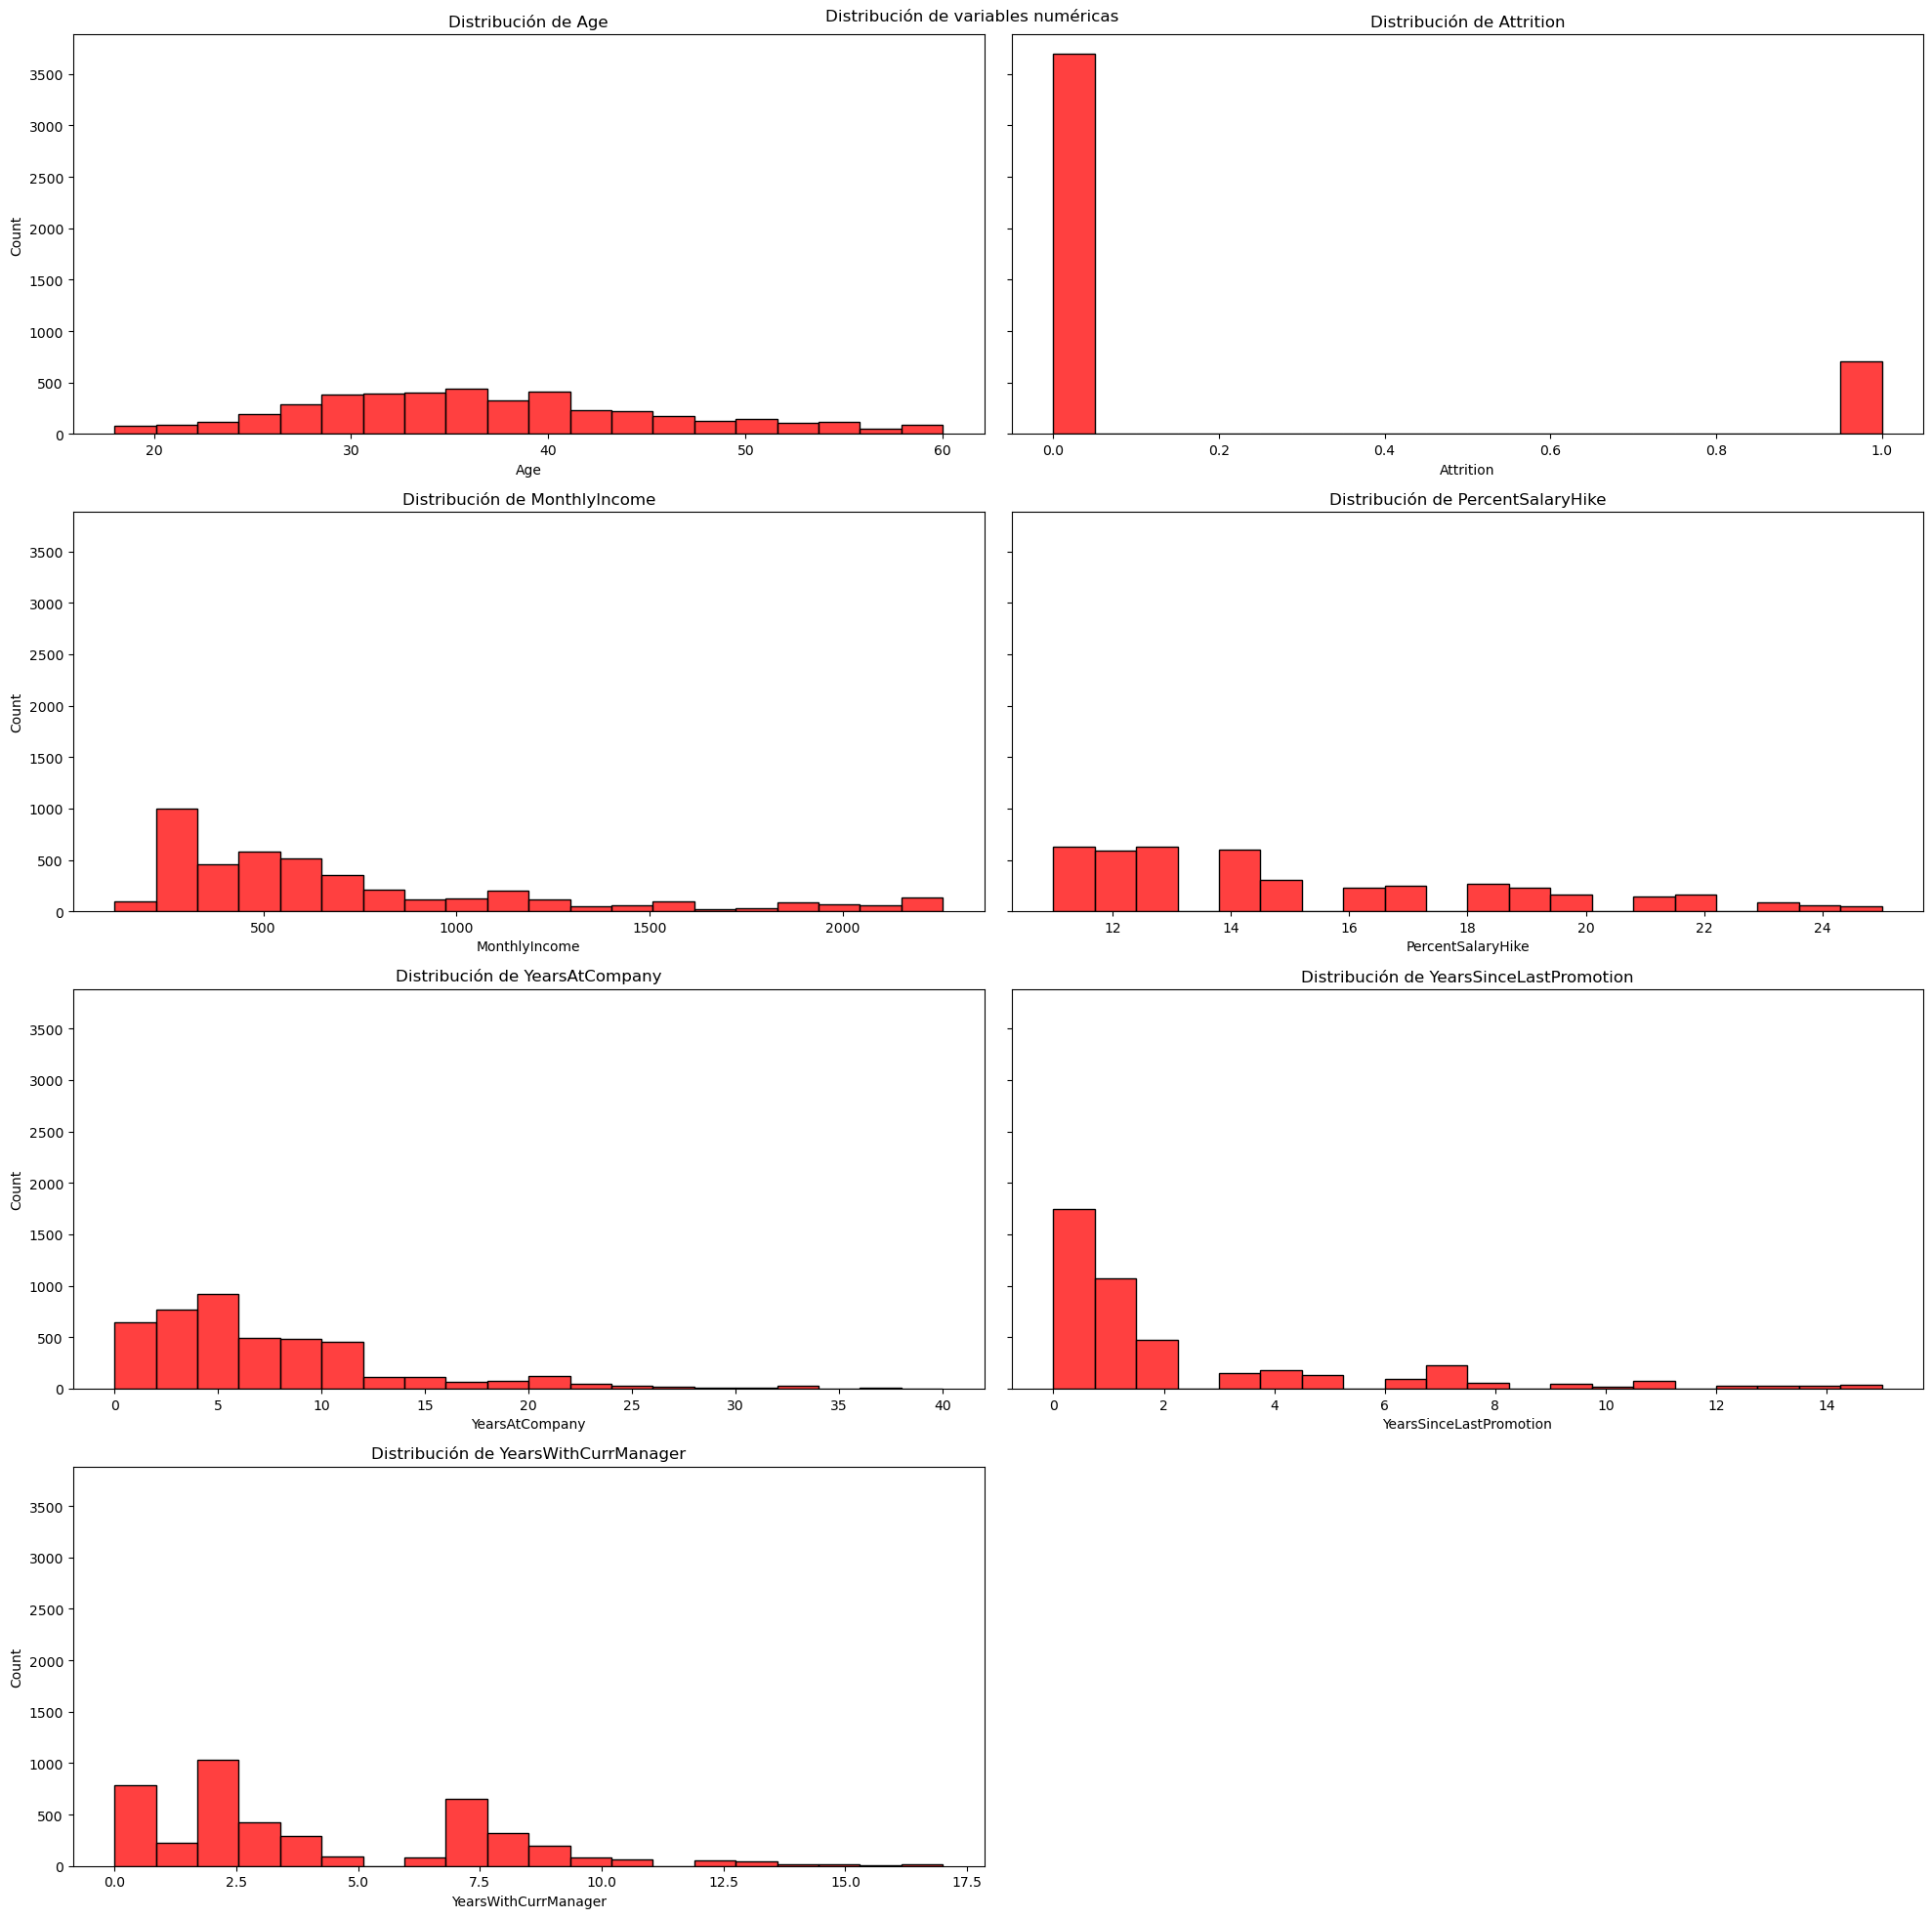

In [48]:
visualizador.plot_numericas(color="red", tamano_grafica=(20, 20))

Podemos observar en las distribuciones de las numéricas para que nos de una idea a la hora de cuáles podrían ser y cuales no normales

***Categóricas***

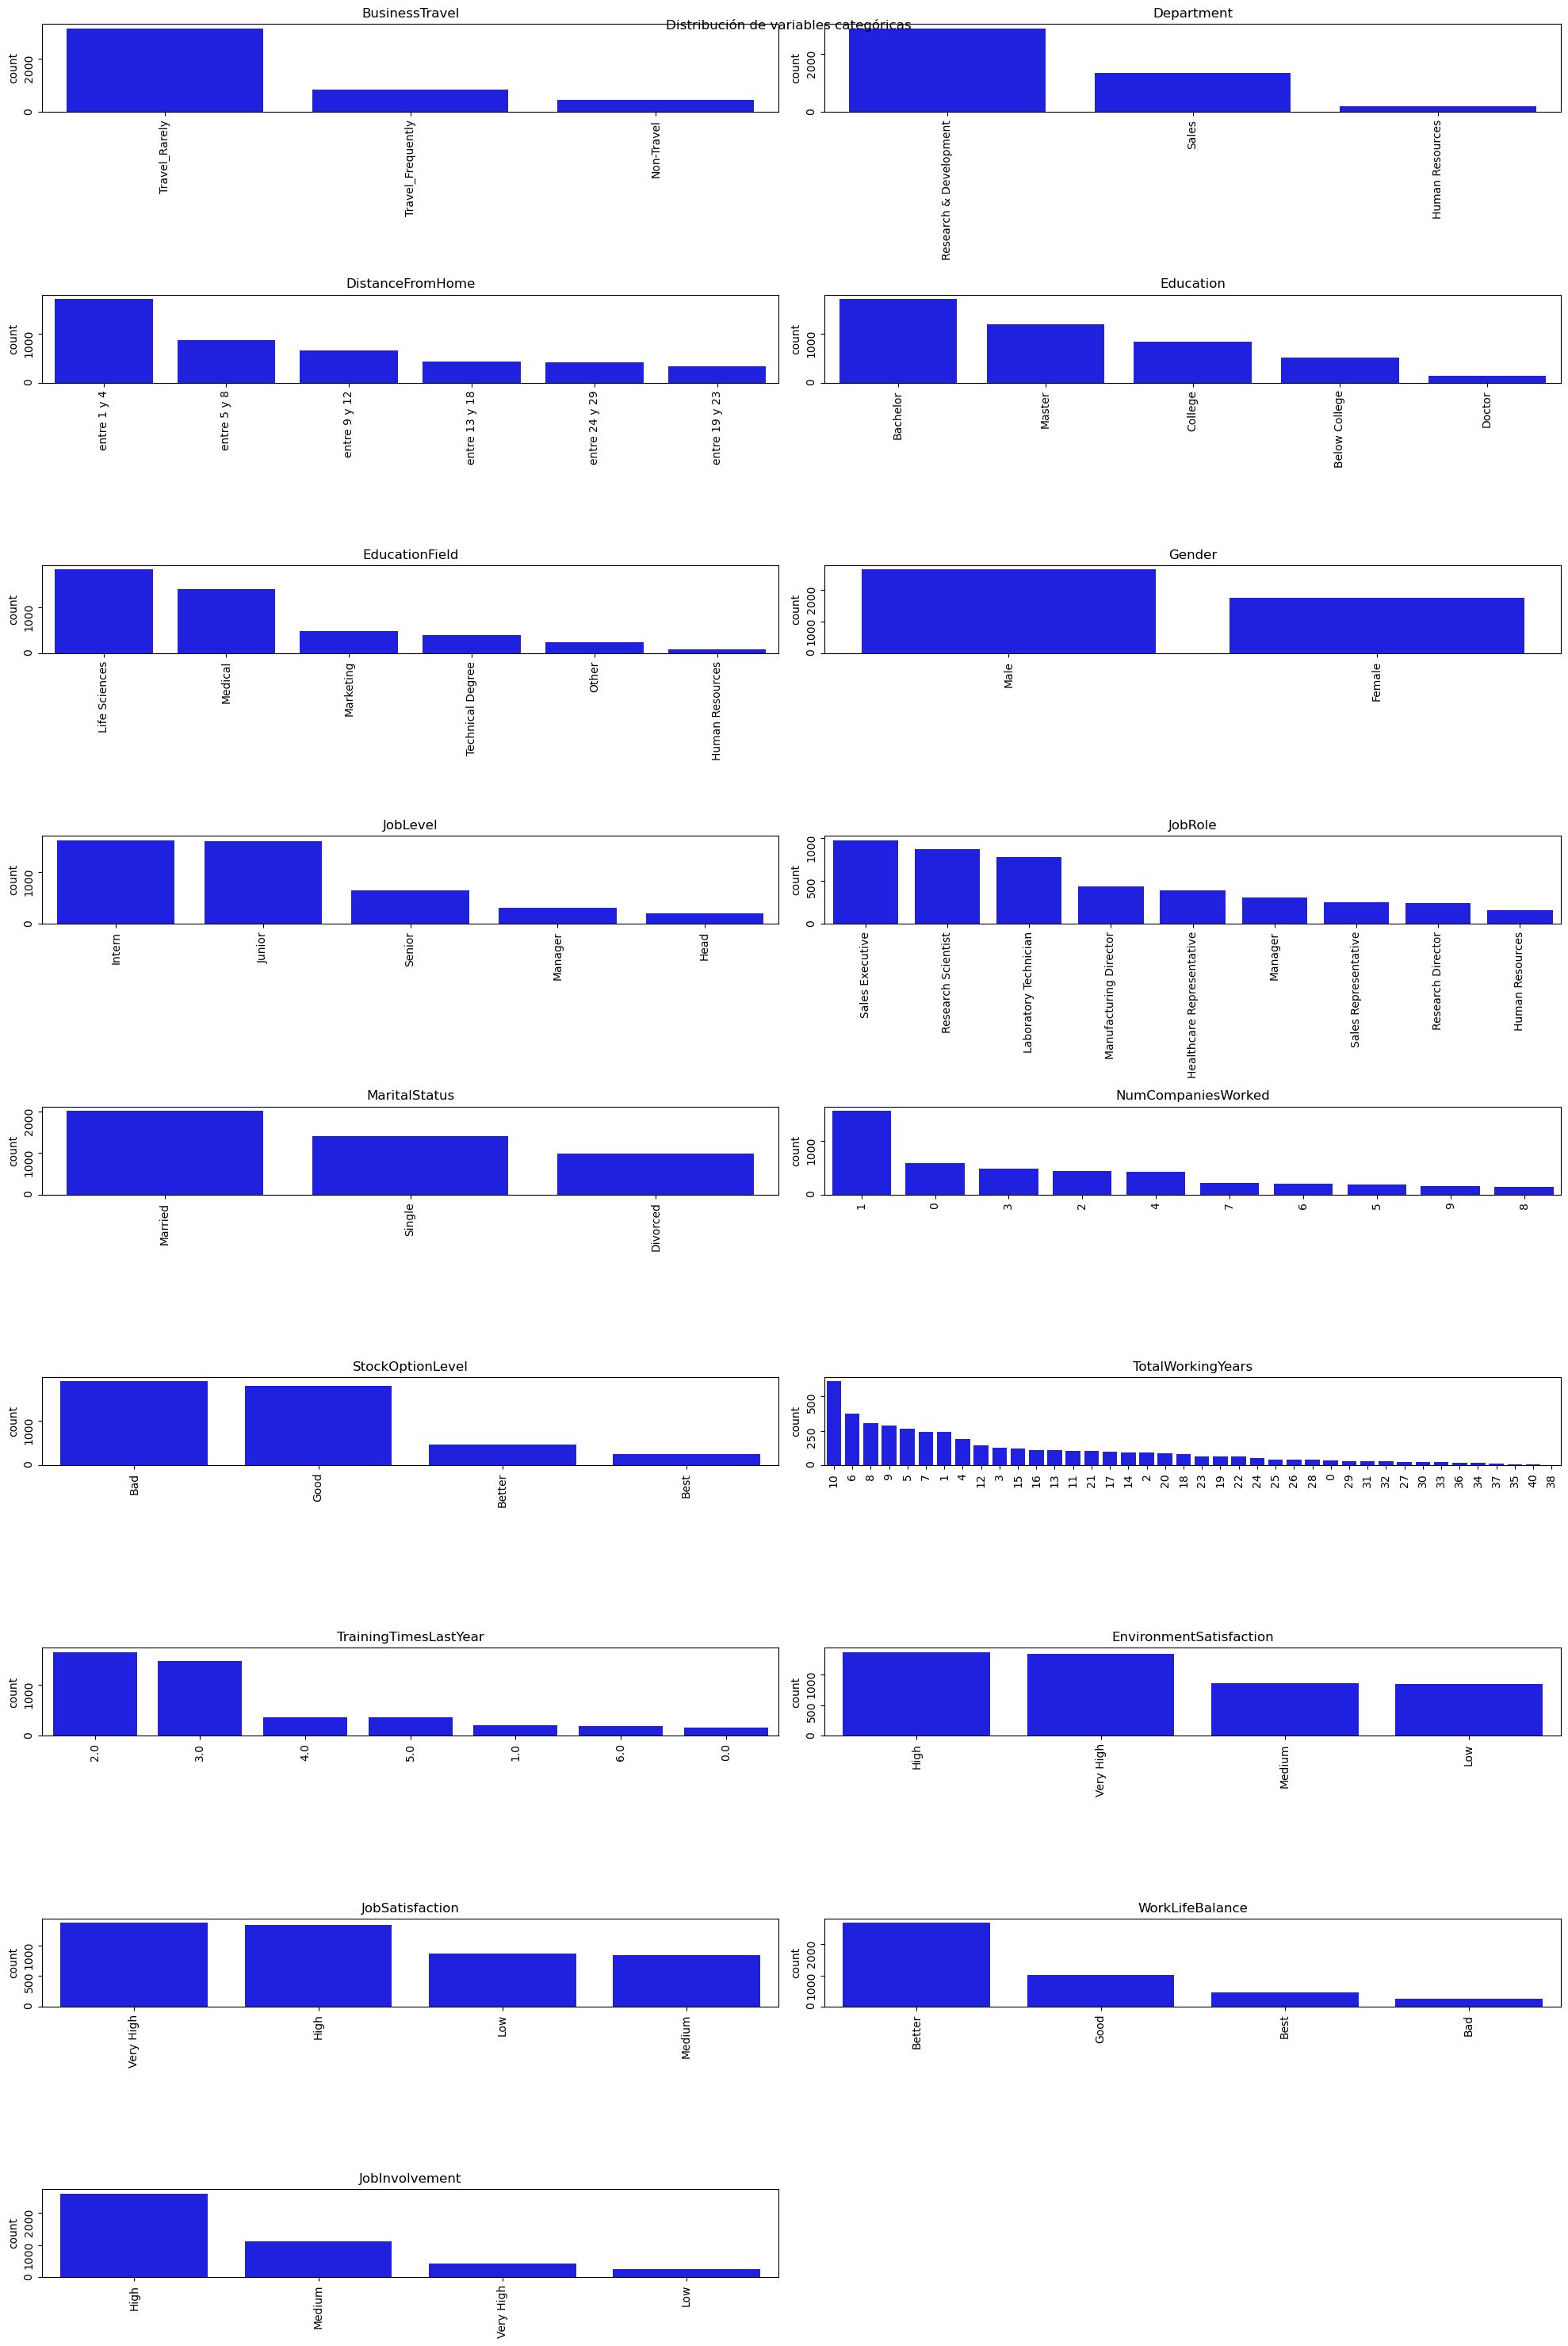

In [49]:
visualizador.plot_categoricas(color="blue", tamano_grafica=(20, 30))

Podemos observar en las columnas categóricas que no parece haber diferencias exageradas o sospechosamente grandes entre una categoría y el resto con lo que no nos planteamos prescindir de ninguna.

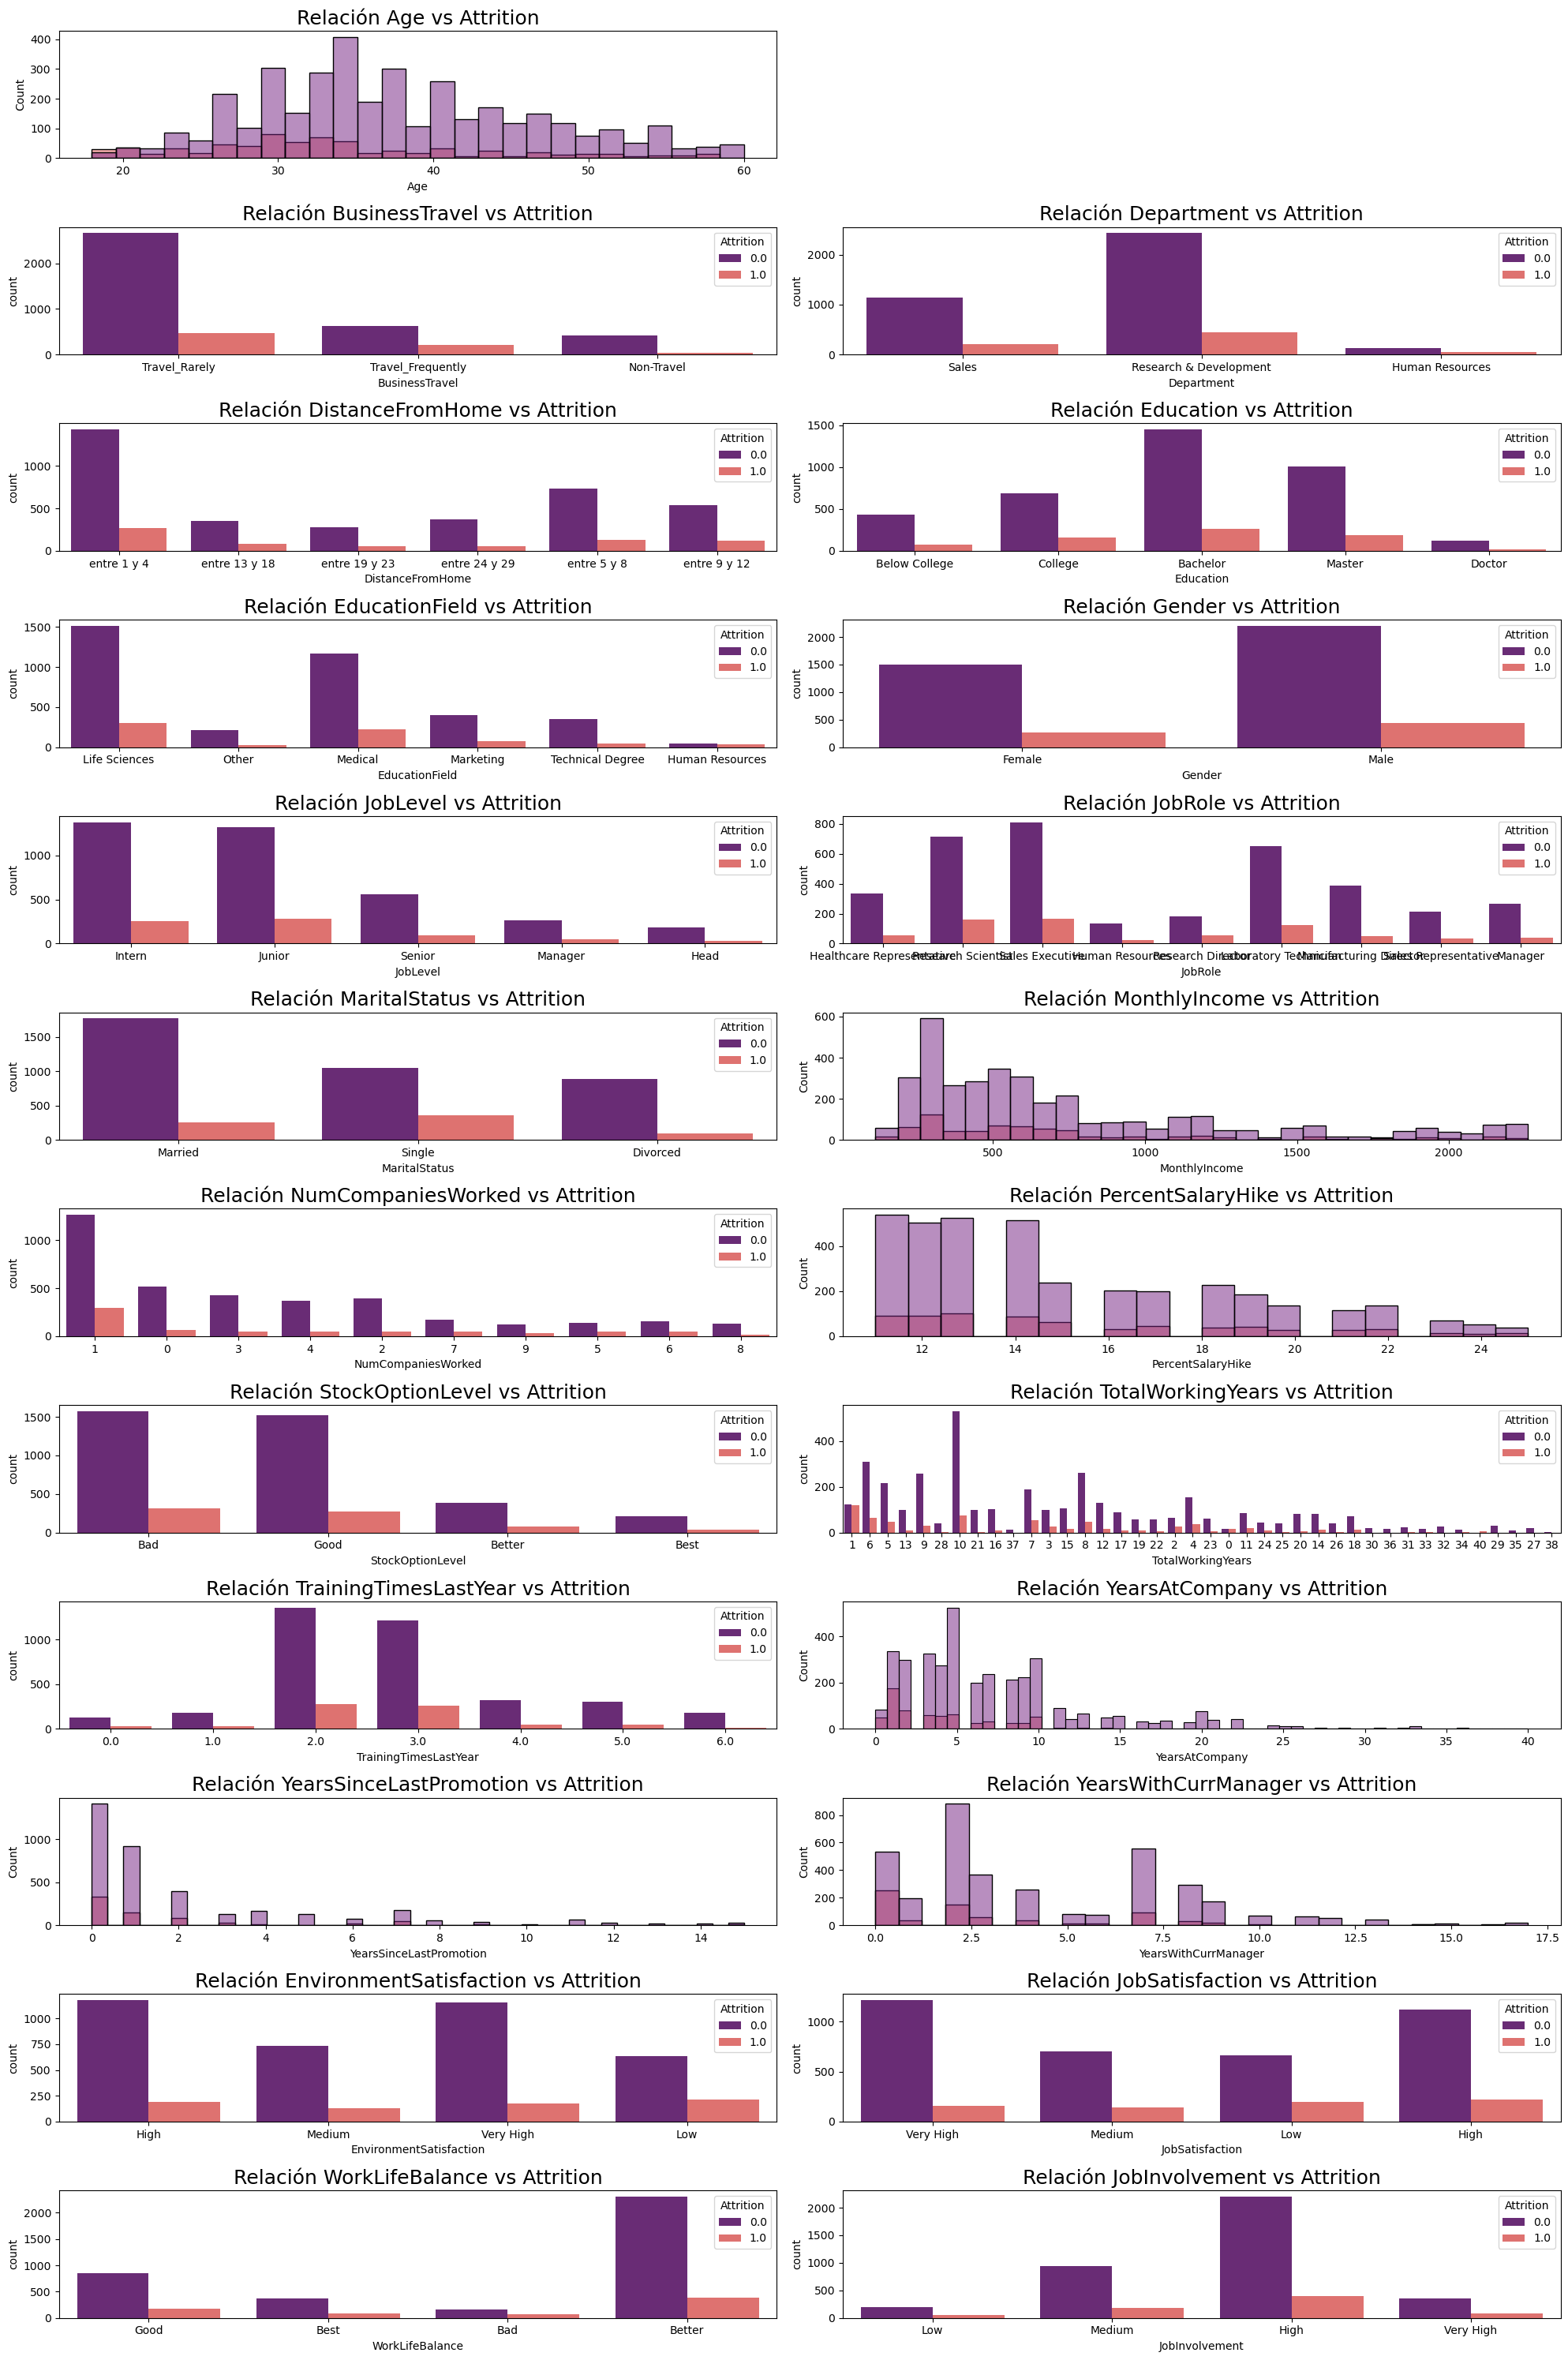

In [50]:
visualizador.plot_relacion("Attrition", tamano_grafica=(20, 30), tamanio_fuente=18)

Podemos observar en la relación de cada columna con la variable dependiente como el NO (0.0) domina en todo debido al desbalanceo.

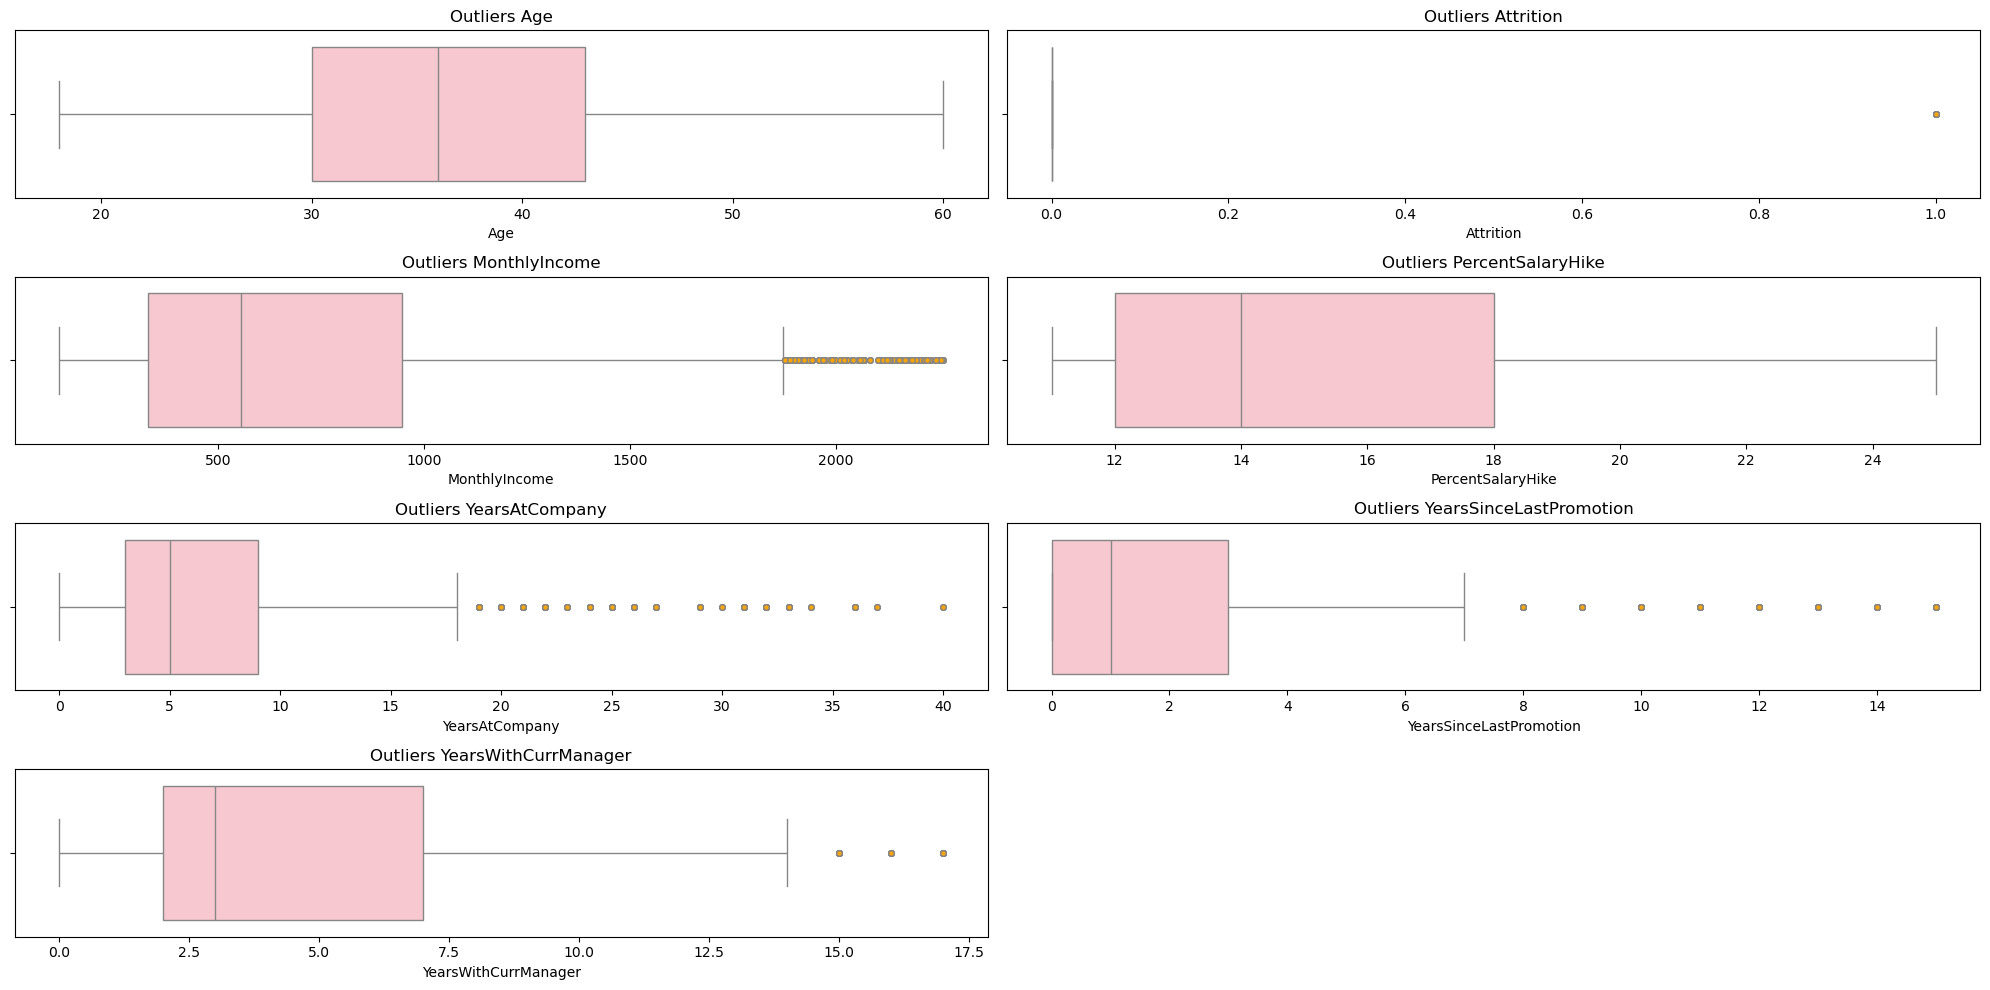

In [51]:
visualizador.deteccion_outliers(color = "pink")

Podemos observar los Outliers univariados en esta gráfica

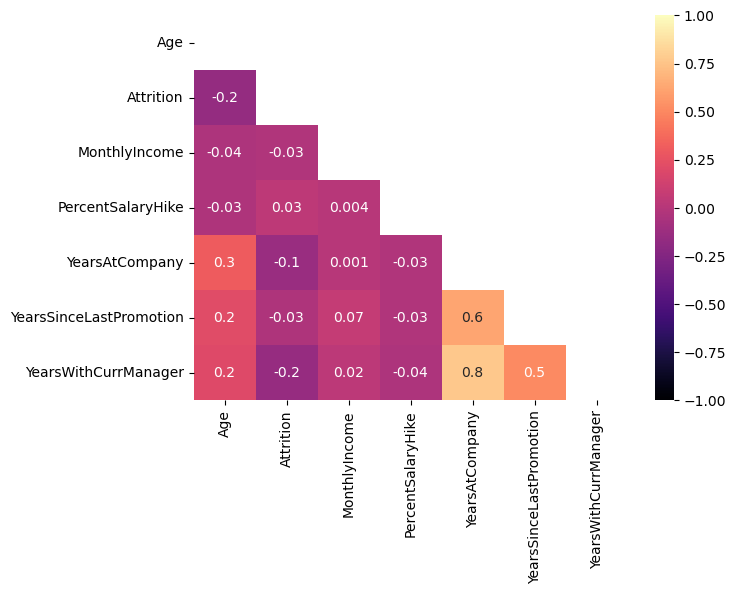

In [52]:
visualizador.correlacion(tamano_grafica = (7, 5))

**Correlacion muy alta entre YearsAtCompany y YearsWithCurrManager me cargo ***YearsWithCurrManager*** .**

In [53]:
df_formateado.drop(columns="YearsWithCurrManager", inplace=True)

### **DESBALANCEO**  
  
   

In [54]:
round(df_crudo["Attrition"].value_counts(normalize=True)*100,2)

Attrition
0    83.88
1    16.12
Name: proportion, dtype: float64

##### Ahora que ya hemos terminado con esto pasamos la variable dependiente a numérica

## EDA 
  
### Estadísticos principales  
- No parace haber demasiada distorsión entre la media y la mediana de la mayoría de variables (Exceptuando MonthlyIncome y StockOptional aunque no es nada exagerado) lo que nos muestra que no parece haber muchos valores atípicos. 
  

#### Duplicados  
- No hay datos duplicados en la base de datos  
- Sin embargo al eliminar columnas entre ellas el EmployeeID se nos generan duplicados (Es raro que haya gente que comparta distancia, satisfacción, edad, puesto etc (Se hace primero con los duplicados y luego sin ellos))
  
#### Datos relevantes  
- Las columnas que se eliminan son Over18 y EmployeeCount, StandardHours, EmployeeID porque no aportan nada de información.   
  
- La columna YearsWithCurrManager   está muy correlacionada con YearsAtCompany asi que me cargo YearsWithCurrManager
  
#### Nulos  
- Tenemos 5 columnas con nulos: NumCompaniesWorked ,EnvironmentSatisfaction ,JobSatisfaction ,WorkLifeBalance (las cuales imputo nulos y luego paso a categóricas) y TotalWorkingYears (la cual voy a mantener como numérica).  
  
    
#### Formateos  
- La variable dependiente la codificamos como 0 para la categoría No y 1 para la categoría Si  
  
- Variables como Jobsatisfaction, JobLevel, Education, PerformaceRate etc las paso a categóricas (un total de 11 columnas paso a categóricas) y en el caso concreto de DistanceFromHome agrupo en categorías  (Tras haber imputado sus nulos mientras eran numéricas).

#### Outliers  
- Se detectan Outliers univariados en MonthlyIncome y todas las variables de Years     

#### Desbalanceo  
- Existe un Desvalanceo de 84% (No) frente a 16% (Si) que trataremos a la hora de separar nuestros datos en X e Y usando un SMOTENC, y un 
  
       

  

   

## FILTROS (LIMPIEZA INICIAL)

***Observamos los outliers univariados en MonthlyIncome***

In [55]:
df_formateado[df_formateado["MonthlyIncome"] > 1830].head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
2,32.0,0.0,Travel_Frequently,Research & Development,entre 13 y 18,Master,Other,Male,Manager,Sales Executive,Married,2184.064,1,15.0,Best,5,2.0,5.0,0.0,Medium,Medium,Bad,High
26,26.0,0.0,Travel_Frequently,Research & Development,entre 9 y 12,Bachelor,Life Sciences,Female,Intern,Manager,Married,1840.883,1,22.0,Bad,5,3.0,5.0,3.0,Low,Low,Better,High
55,33.0,0.0,Travel_Frequently,Research & Development,entre 9 y 12,Bachelor,Life Sciences,Male,Manager,Research Director,Married,2191.296,6,12.0,Good,12,3.0,10.0,8.0,Very High,Medium,Better,High
56,39.0,0.0,Travel_Rarely,Sales,entre 1 y 4,Master,Life Sciences,Male,Intern,Sales Executive,Married,2222.145,1,22.0,Good,21,6.0,21.0,11.0,High,Low,Better,High
73,27.0,0.0,Non-Travel,Research & Development,entre 1 y 4,Bachelor,Life Sciences,Male,Intern,Research Director,Married,1900.999,0,17.0,Bad,6,3.0,5.0,1.0,High,Medium,Better,High


In [56]:
(df_formateado["MonthlyIncome"] > 1830).sum()

363

<!-- ***Observamos los outliers univariados en TotalWorkingYears*** -->

In [ ]:
# df_formateado[df_formateado["TotalWorkingYears"] > 28].head()

TypeError: '>' not supported between instances of 'str' and 'int'

In [58]:
# (df_formateado["TotalWorkingYears"] > 28).sum()

***Observamos los outliers univariados en YearsAtCompany***

In [ ]:
df_formateado[df_formateado["YearsAtCompany"] >18].head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
12,55.0,0.0,Travel_Rarely,Research & Development,entre 13 y 18,Master,Life Sciences,Female,Intern,Sales Executive,Single,625.794,0,17.0,Bad,37,2.0,36.0,4.0,Very High,Low,Better,High
153,60.0,0.0,Travel_Rarely,Research & Development,entre 9 y 12,Bachelor,Life Sciences,Female,Intern,Manufacturing Director,Married,256.397,5,18.0,Good,33,4.0,29.0,11.0,Low,Low,Bad,High
215,49.0,0.0,Travel_Rarely,Sales,entre 19 y 23,Below College,Life Sciences,Male,Intern,Sales Executive,Divorced,453.243,1,18.0,Better,31,2.0,31.0,0.0,Very High,High,Better,Low
219,50.0,0.0,Travel_Frequently,Sales,entre 1 y 4,College,Marketing,Male,Intern,Sales Executive,Married,334.480,1,14.0,Best,32,2.0,32.0,10.0,Low,Medium,Better,High
303,52.0,0.0,Travel_Rarely,Sales,entre 19 y 23,Doctor,Technical Degree,Male,Senior,Manager,Married,326.457,1,11.0,Good,34,2.0,34.0,1.0,High,Low,Best,High


In [60]:
(df_formateado["YearsAtCompany"] > 18).sum()

312

***Observamos los outliers univariados en YearsSinceLastPromotion***

In [61]:
df_formateado[df_formateado["YearsSinceLastPromotion"] >7].head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
11,36.0,0.0,Travel_Rarely,Research & Development,entre 24 y 29,Below College,Life Sciences,Male,Intern,Laboratory Technician,Married,381.601,0,12.0,Better,16,2.0,15.0,10.0,High,Very High,Better,High
13,47.0,1.0,Non-Travel,Research & Development,entre 1 y 4,Below College,Medical,Male,Intern,Research Scientist,Married,651.106,1,11.0,Better,10,4.0,10.0,9.0,Low,Medium,Good,Medium
23,42.0,0.0,Travel_Rarely,Research & Development,entre 1 y 4,Master,Life Sciences,Male,Intern,Manufacturing Director,Married,1008.638,1,14.0,Bad,13,4.0,20.0,11.0,Medium,High,Better,Low
53,45.0,0.0,Travel_Frequently,Research & Development,entre 1 y 4,Below College,Medical,Female,Intern,Sales Executive,Divorced,400.020,1,13.0,Bad,24,6.0,24.0,9.0,Low,Low,Better,High
55,33.0,0.0,Travel_Frequently,Research & Development,entre 9 y 12,Bachelor,Life Sciences,Male,Manager,Research Director,Married,2191.296,6,12.0,Good,12,3.0,10.0,8.0,Very High,Medium,Better,High


In [62]:
(df_formateado["YearsSinceLastPromotion"] > 7).sum()

321

***Observamos los outliers univariados en YearsWithCurrManager***   QUE NO HACE FALTA PORQUE LA HEMOS ELIMINADO

In [63]:
# df_formateado[df_formateado["YearsWithCurrManager"] >14]

In [64]:
# (df_formateado["YearsWithCurrManager"] > 14).sum()

In [65]:
df_formateado.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,51.0,0.0,Travel_Rarely,Sales,entre 5 y 8,College,Life Sciences,Female,Intern,Healthcare Representative,Married,1482.108,1,11.0,Bad,1,6.0,1.0,0.0,High,Very High,Good,High
1,31.0,1.0,Travel_Frequently,Research & Development,entre 9 y 12,Below College,Life Sciences,Female,Intern,Research Scientist,Single,473.357,0,23.0,Good,6,3.0,5.0,1.0,High,Medium,Best,Medium
2,32.0,0.0,Travel_Frequently,Research & Development,entre 13 y 18,Master,Other,Male,Manager,Sales Executive,Married,2184.064,1,15.0,Best,5,2.0,5.0,0.0,Medium,Medium,Bad,High
3,38.0,0.0,Non-Travel,Research & Development,entre 1 y 4,Doctor,Life Sciences,Male,Senior,Human Resources,Married,940.273,3,11.0,Best,13,5.0,8.0,7.0,Very High,Very High,Better,Medium
4,32.0,0.0,Travel_Rarely,Research & Development,entre 9 y 12,Below College,Medical,Male,Intern,Sales Executive,Single,264.646,4,12.0,Better,9,2.0,6.0,0.0,Very High,Low,Better,High


Tras Observar los Outliers, nos hacemos una idea de cara al momento que los acabemos tratando

In [66]:
df_formateado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   float64 
 1   Attrition                4410 non-null   float64 
 2   BusinessTravel           4410 non-null   object  
 3   Department               4410 non-null   object  
 4   DistanceFromHome         4410 non-null   category
 5   Education                4410 non-null   category
 6   EducationField           4410 non-null   object  
 7   Gender                   4410 non-null   object  
 8   JobLevel                 4410 non-null   category
 9   JobRole                  4410 non-null   object  
 10  MaritalStatus            4410 non-null   object  
 11  MonthlyIncome            4410 non-null   float64 
 12  NumCompaniesWorked       4410 non-null   object  
 13  PercentSalaryHike        4410 non-null   float64 
 14  StockOpt

In [67]:
df_formateado.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
dtype: int64

In [68]:
df_formateado.to_pickle("../../datos/datos1/datos_sin_nulos.pkl")